## Assignment 1 - Jasmine Gohil
BUID - U37453585

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import numpy as np
import statsmodels.api as sm

##Step 3

In [ ]:
df = pd.read_csv('assign1-fix.csv')
df

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve
0,1121,12/31/22,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,72.964,3366.917,38.9200,10,97.105
1,1380,12/31/22,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,1343.000,11324.000,141.8200,10,43422.022
2,1661,12/31/22,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,-1852.191,2653.766,154.8700,10,1458.101
3,1678,12/31/22,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,-5800.000,10961.000,46.6800,10,14543.574
4,1864,1/31/22,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,642.350,774.802,96.0000,10,568.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,222357,12/31/22,CIG,CIA ENERGETICA DE MINAS,2547.015,10152.311,2200.524,905.879,2119.140,6031.688,1611.817,6518.960,2.0300,55,4467.064
4139,238616,12/31/22,VEOEY,VEOLIA ENVIRONNEMENT S A,30687.437,78343.188,701.955,3180.043,31211.228,62454.304,-377.159,45833.332,25.6140,55,17979.875
4140,267054,12/31/22,EDN,EMPRESA DISTRIBUIDORA Y COM,471.198,2710.724,43.773,-235.153,1122.109,2001.239,119.589,1162.103,7.9900,55,349.746
4141,331125,3/31/22,RNW,RENEW ENERGY GLOBAL PLC,1781.675,8450.913,399.178,267.794,1334.543,6785.708,-532.610,782.036,7.7800,55,3105.605


In [ ]:
df.dtypes

gvkey         int64
datadate     object
tic          object
conm         object
act         float64
at          float64
csho        float64
ebit        float64
lct         float64
lt          float64
re          float64
sale        float64
prcc_c      float64
gsector       int64
mve         float64
dtype: object

For easy analysis and convenience, the columns date has been changed to date and time format, column tic and company name has also been changed to a string format.

In [ ]:
df['datadate'] = pd.to_datetime(df['datadate'])
df['tic'] = df['tic'].astype('str')
df['conm'] = df['conm'].astype('str')

In [ ]:
df.dtypes

gvkey                int64
datadate    datetime64[ns]
tic                 object
conm                object
act                float64
at                 float64
csho               float64
ebit               float64
lct                float64
lt                 float64
re                 float64
sale               float64
prcc_c             float64
gsector              int64
mve                float64
dtype: object

##Step 4

In [ ]:
df['net_current_assets'] = df['act'] - df['lct']
df['A'] = df['net_current_assets'] / df['at']

A = Net Working Capital Ratio - A firm's current assets less its current liabilities divided by its total assets. It shows the amount of additional funds available for financing operations in relationship to the size of the business.

In [ ]:
df['B'] = df['re'] / df['at']

The Retained Earnings / Total Assets ratio measures the amount of reinvested earnings or losses, which reflects the extent of the company's leverage.

In [ ]:
df['C'] = df['ebit'] / df['at']

The EBIT/Total Assets ratio demonstrates a company's ability to generate enough revenues to stay profitable and fund ongoing operations and make debt payments

In [ ]:
df['D'] = df['mve'] / df['lt']

The Market Value of Equity / Total Liability shows that if a firm were to become insolvent, how much the company's market value would decline before liabilities exceed assets on the financial statements.

In [ ]:
df['E'] = df['sale'] / df['at']

The Total Sales/ Total Assets ratio measures a company's efficiency in utilizing its assets to generate revenue, making the assets worthwhile.

In [ ]:
df

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,...,sale,prcc_c,gsector,mve,net_current_assets,A,B,C,D,E
0,1121,2022-12-31,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,...,3366.917,38.9200,10,97.105,19.083,0.049675,0.189932,0.016324,0.333715,8.764384
1,1380,2022-12-31,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,...,11324.000,141.8200,10,43422.022,1535.000,0.070754,0.061904,0.174833,3.289796,0.521964
2,1661,2022-12-31,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,...,2653.766,154.8700,10,1458.101,404.233,0.085464,-0.391596,0.006165,0.414886,0.561067
3,1678,2022-12-31,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,...,10961.000,46.6800,10,14543.574,-208.000,-0.015821,-0.441165,0.377881,1.232297,0.833726
4,1864,2022-01-31,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,...,774.802,96.0000,10,568.320,294.684,0.535438,1.167143,0.125525,9.049826,1.407807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,222357,2022-12-31,CIG,CIA ENERGETICA DE MINAS,2547.015,10152.311,2200.524,905.879,2119.140,6031.688,...,6518.960,2.0300,55,4467.064,427.875,0.042146,0.158764,0.089229,0.740599,0.642116
4139,238616,2022-12-31,VEOEY,VEOLIA ENVIRONNEMENT S A,30687.437,78343.188,701.955,3180.043,31211.228,62454.304,...,45833.332,25.6140,55,17979.875,-523.791,-0.006686,-0.004814,0.040591,0.287888,0.585033
4140,267054,2022-12-31,EDN,EMPRESA DISTRIBUIDORA Y COM,471.198,2710.724,43.773,-235.153,1122.109,2001.239,...,1162.103,7.9900,55,349.746,-650.911,-0.240124,0.044117,-0.086749,0.174765,0.428706
4141,331125,2022-03-31,RNW,RENEW ENERGY GLOBAL PLC,1781.675,8450.913,399.178,267.794,1334.543,6785.708,...,782.036,7.7800,55,3105.605,447.132,0.052909,-0.063024,0.031688,0.457669,0.092539


In [ ]:
df.describe()

,gvkey,act,at,csho,ebit,lct,lt,re,sale,prcc_c,gsector,mve,net_current_assets,A,B,C,D,E
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4.143000e+03,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000
mean,68788.296162,2838.676972,9141.545973,699.473091,815.686837,2260.312535,5787.138424,1860.860470,6547.985255,45.761654,31.090997,1.079716e+04,578.364437,-0.240843,-5.194409,-0.283971,7.157489,0.791782
std,72971.209691,11309.900743,34152.368936,13724.068718,4373.475906,9726.520173,22174.194242,13157.676893,28433.224052,332.397139,12.139725,5.915286e+04,3346.647308,9.275482,63.327547,3.280859,56.195514,1.024588
min,1004.000000,0.003000,0.005000,0.013000,-26532.098000,0.003000,0.012000,-102034.000000,0.001000,0.000001,10.000000,6.000000e-03,-26556.946000,-424.285714,-2831.400000,-163.300000,0.000584,0.000119
25%,21430.000000,51.214500,102.867500,27.242500,-22.297000,22.705000,40.720500,-300.668000,40.166000,1.935000,20.000000,7.265650e+01,4.692000,0.031679,-1.346390,-0.201873,0.761366,0.320567
50%,36383.000000,304.645000,711.363000,65.472000,5.934000,131.433000,330.110000,-31.187000,436.674000,10.060000,30.000000,6.524500e+02,90.058000,0.179247,-0.145646,0.022212,1.826824,0.592677
75%,111051.500000,1305.689500,3818.420000,177.037500,265.077500,752.968500,2256.053500,396.774000,2656.783000,39.985000,45.000000,4.030669e+03,422.881500,0.415187,0.211838,0.092716,4.405608,1.011351
max,353945.000000,239728.503000,603595.692000,606407.693000,119437.000000,195571.280000,413010.095000,419590.000000,569962.000000,20000.000000,55.000000,2.071529e+06,95495.000000,0.990554,6.652454,2.375365,2792.333333,40.857143


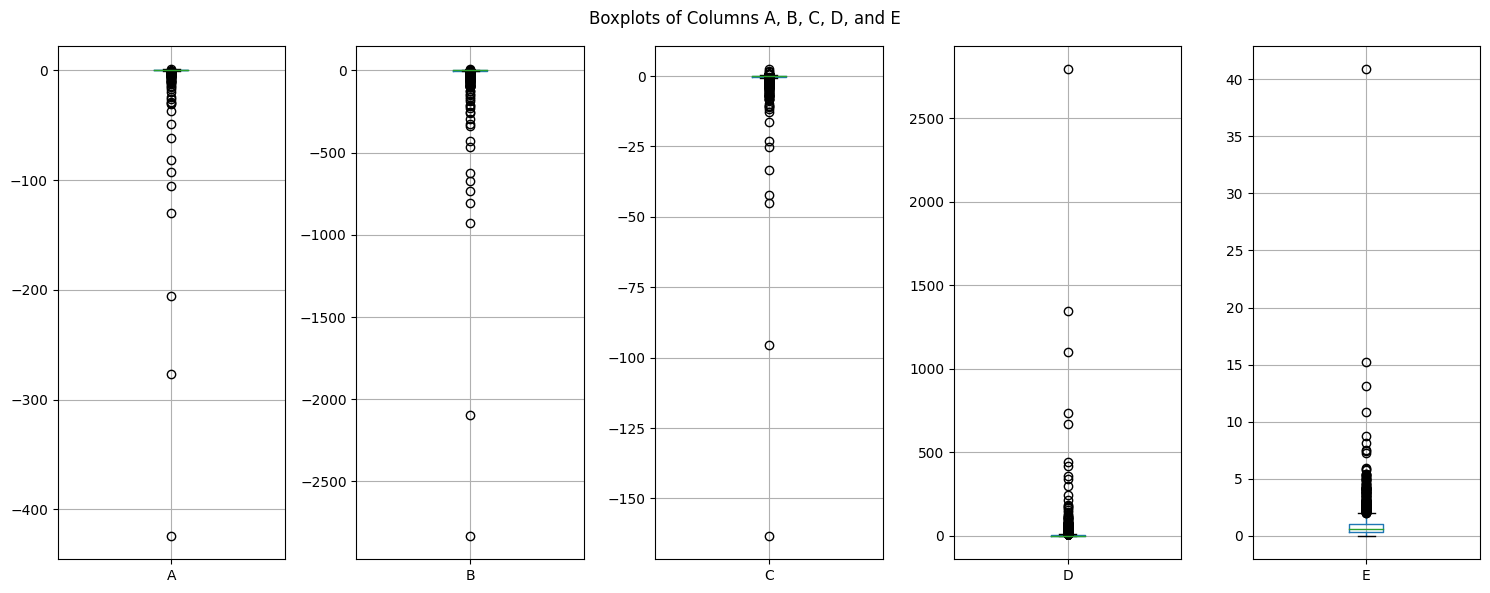

In [ ]:
df1 = pd.DataFrame(df[['A', 'B', 'C', 'D', 'E']])
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))

for i, column in enumerate(df1.columns):
    df1.boxplot(column=column, ax=axes[i])

fig.suptitle('Boxplots of Columns A, B, C, D, and E')
plt.tight_layout()
plt.show()

From the box plot above, we can observe that all columns have significant amount of outliers which need to be taken care of before ahy statistical calculation and analysis.

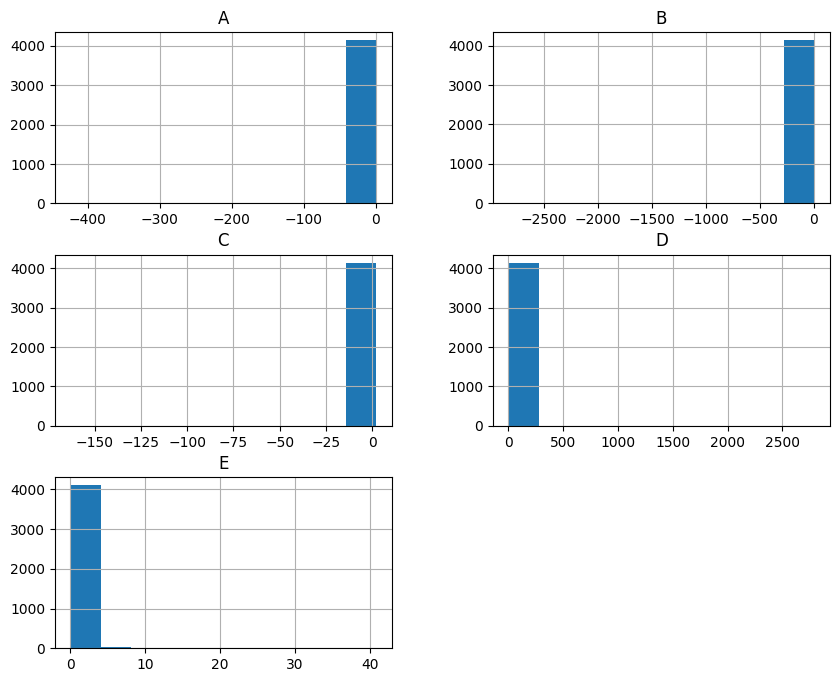

In [ ]:
df1.hist(figsize=(10, 8))
plt.show()

From the above histogram we can observe the skewness of the different columns. The columns A, B and C are left skewed data and the columns D and E are right skewed.

In [ ]:
limits = (0.01, 0.01)

df_win = df1.apply(lambda x: winsorize(x, limits=limits))

print(df_win)

             A         B         C         D         E
0     0.049675  0.189932  0.016324  0.333715  4.049573
1     0.070754  0.061904  0.174833  3.289796  0.521964
2     0.085464 -0.391596  0.006165  0.414886  0.561067
3    -0.015821 -0.441165  0.377881  1.232297  0.833726
4     0.535438  1.017335  0.125525  9.049826  1.407807
...        ...       ...       ...       ...       ...
4138  0.042146  0.158764  0.089229  0.740599  0.642116
4139 -0.006686 -0.004814  0.040591  0.287888  0.585033
4140 -0.240124  0.044117 -0.086749  0.174765  0.428706
4141  0.052909 -0.063024  0.031688  0.457669  0.092539
4142  0.726693 -1.119829 -0.279936  8.084679  0.002616

[4143 rows x 5 columns]


From the graphs above we could conclude that there are significant amount of outliers and presence of skewness in the data. To deal with them, we use one method called Winsorization. It is the method through which the outliers are set to the upper and lower limits of that column. The lower and upper limits are calculated by subtracting and adding 1.5 to the 0.25 Quartile and 0.75 Quartile respectively and then multiplying it by the Interquartile Range.

Above is the snippet of the dataframe consisting winsorised data of all the ratios.

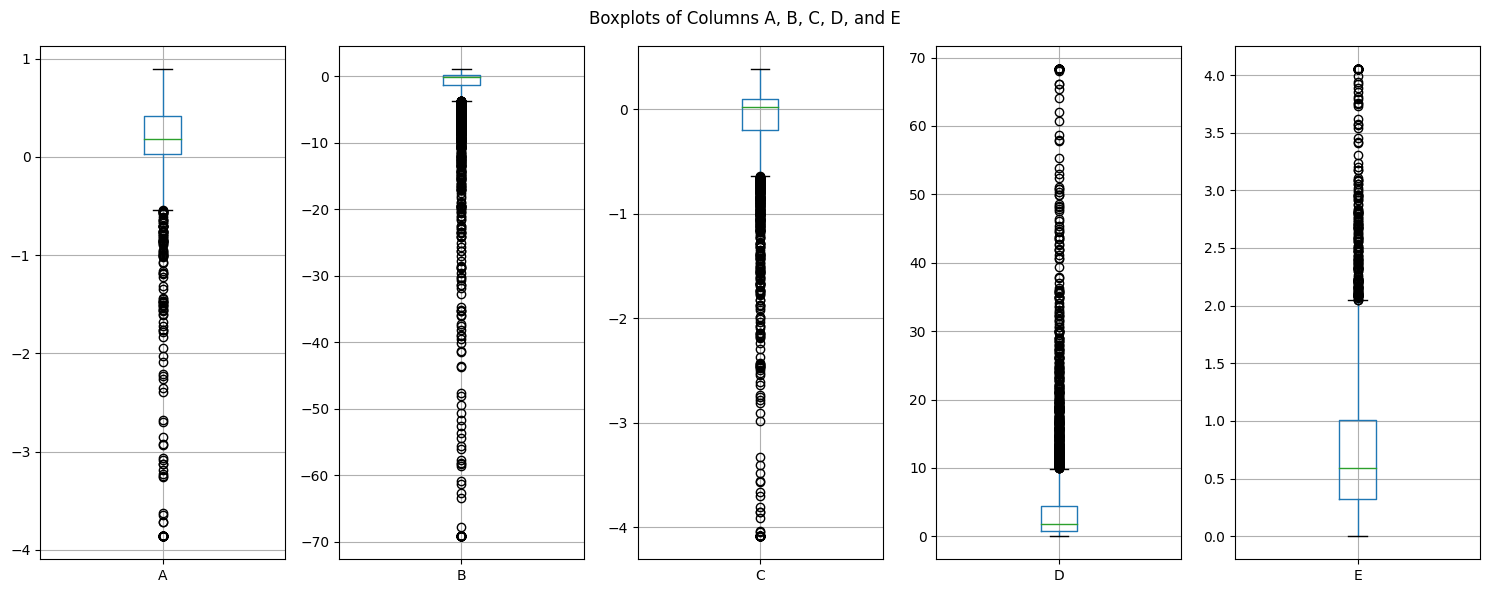

In [ ]:
num_columns = len(df_win.columns)

fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 6))

for i, column in enumerate(df_win.columns):
    df_win.boxplot(column=column, ax=axes[i])

fig.suptitle('Boxplots of Columns A, B, C, D, and E')
plt.tight_layout()
plt.show()

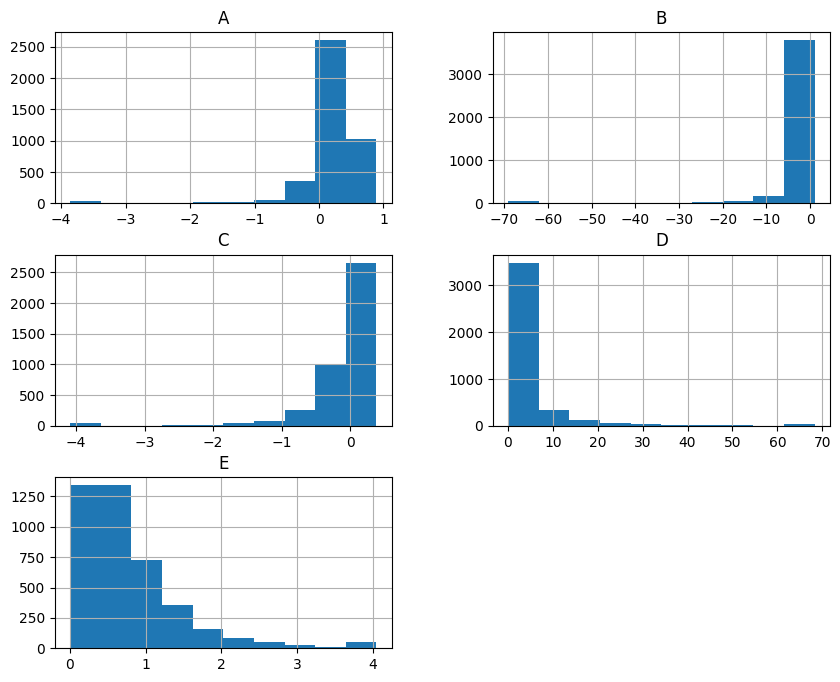

In [ ]:
df_win.hist(figsize=(10,8))
plt.show()

From the above boxplots and histograms we can oberve that even after winsorisation there is presence of outliers and skewness in the data.

## Step 5

In [ ]:
df_win['z_score'] = 1.2 * df_win['A'] + 1.4 * df_win['B'] + 3.3 * df_win['C'] + 0.6 * df_win['D'] + 1 * df_win['E']
df_win['log_at'] = np.log(df['at'])
df_win

,A,B,C,D,E,z_score,log_at
0,0.049675,0.189932,0.016324,0.333715,4.049573,4.629185,5.951057
1,0.070754,0.061904,0.174833,3.289796,0.521964,3.244359,9.984837
2,0.085464,-0.391596,0.006165,0.414886,0.561067,0.384667,8.461650
3,-0.015821,-0.441165,0.377881,1.232297,0.833726,2.183495,9.483949
4,0.535438,1.017335,0.125525,9.049826,1.407807,9.318728,6.310574
...,...,...,...,...,...,...,...
4138,0.042146,0.158764,0.089229,0.740599,0.642116,1.653774,9.225457
4139,-0.006686,-0.004814,0.040591,0.287888,0.585033,0.876954,11.268854
4140,-0.240124,0.044117,-0.086749,0.174765,0.428706,0.020907,7.904971
4141,0.052909,-0.063024,0.031688,0.457669,0.092539,0.446968,9.042030


A Z-Score is a metric that measures the potential bankruptcy or insolvency of a company. This is used to find a value’s relationship to the average of a group of values, measured in terms of standard deviation from the mean. A good Z-score for a company is anything above 3. This indicates the company is doing well and is not near bankruptcy. This also represents a company with a safe balance sheet.

Calculating the natural logarithm of total assets (log_at) because total assets can vary over several orders of magnitude across companies, which can make the data highly skewed. Taking the logarithm helps normalize the data by compressing large values and spreading out small values, making it easier to interpret and analyze.

In [ ]:
# Dropping rows from df_old
df_old = df.drop(columns=df[['A', 'B', 'C', 'D', 'E']])

# Merging df_old with df_win
df_new = pd.merge(df_old, df_win, left_index=True, right_index=True)
df_new

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,...,gsector,mve,net_current_assets,A,B,C,D,E,z_score,log_at
0,1121,2022-12-31,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,...,10,97.105,19.083,0.049675,0.189932,0.016324,0.333715,4.049573,4.629185,5.951057
1,1380,2022-12-31,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,...,10,43422.022,1535.000,0.070754,0.061904,0.174833,3.289796,0.521964,3.244359,9.984837
2,1661,2022-12-31,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,...,10,1458.101,404.233,0.085464,-0.391596,0.006165,0.414886,0.561067,0.384667,8.461650
3,1678,2022-12-31,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,...,10,14543.574,-208.000,-0.015821,-0.441165,0.377881,1.232297,0.833726,2.183495,9.483949
4,1864,2022-01-31,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,...,10,568.320,294.684,0.535438,1.017335,0.125525,9.049826,1.407807,9.318728,6.310574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,222357,2022-12-31,CIG,CIA ENERGETICA DE MINAS,2547.015,10152.311,2200.524,905.879,2119.140,6031.688,...,55,4467.064,427.875,0.042146,0.158764,0.089229,0.740599,0.642116,1.653774,9.225457
4139,238616,2022-12-31,VEOEY,VEOLIA ENVIRONNEMENT S A,30687.437,78343.188,701.955,3180.043,31211.228,62454.304,...,55,17979.875,-523.791,-0.006686,-0.004814,0.040591,0.287888,0.585033,0.876954,11.268854
4140,267054,2022-12-31,EDN,EMPRESA DISTRIBUIDORA Y COM,471.198,2710.724,43.773,-235.153,1122.109,2001.239,...,55,349.746,-650.911,-0.240124,0.044117,-0.086749,0.174765,0.428706,0.020907,7.904971
4141,331125,2022-03-31,RNW,RENEW ENERGY GLOBAL PLC,1781.675,8450.913,399.178,267.794,1334.543,6785.708,...,55,3105.605,447.132,0.052909,-0.063024,0.031688,0.457669,0.092539,0.446968,9.042030


Adding the new winsorized columns of the ratios, z-score and log total assets to the original dataframe for further analysis.

###Step 5(a)

In [ ]:
z_score_stats = df_new['z_score'].agg(['mean', 'median', 'max', 'min', 'std']).rename(lambda x: f'z_score_{x}')
log_at_stats = df_new['log_at'].agg(['mean', 'median', 'max', 'min', 'std']).rename(lambda x: f'log_at_{x}')

combined_stats_df = pd.concat([z_score_stats, log_at_stats])
combined_stats_df

z_score_mean       -0.045953
z_score_median      1.864172
z_score_max        45.183629
z_score_min      -114.602612
z_score_std        15.186289
log_at_mean         6.429269
log_at_median       6.567183
log_at_max         13.310660
log_at_min         -5.298317
log_at_std          2.653560
dtype: float64

A mean z-score of -0.046 suggests that, on average, companies in the dataset do not exhibit significant financial distress risk based on this model.

A median z-score of 1.864 indicates that half the companies have scores above 1.8, potentially signaling a "grey area" where further analysis is warranted.

The wide range of z-scores (maximum 45.184, minimum -114.603) suggests significant diversity in financial health across the companies.

A high standard deviation (15.186) implies that the z-scores are spread out, highlighting the need for individual company analysis beyond just the average score.

Overall, these statistics provide insights into the distribution, central tendency, and variability of the natural logarithm of total assets in the dataset. They can help us understand the typical range of values and identify any extreme or outlier observations.

### Step 5(b)

In [ ]:
conditions = [
    (df_new['z_score'] > 2.99),
    (df_new['z_score'] > 1.8) & (df_new['z_score'] < 2.99),
    (df_new['z_score'] < 1.80)]

values = ['Safe Zone', 'Grey Zone', 'Distress Zone']

df_new['zone'] = np.select(conditions, values)
df_new

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,...,mve,net_current_assets,A,B,C,D,E,z_score,log_at,zone
0,1121,2022-12-31,AE,ADAMS RESOURCES & ENERGY INC,250.143,384.159,2.495,6.271,231.060,290.982,...,97.105,19.083,0.049675,0.189932,0.016324,0.333715,4.049573,4.629185,5.951057,Safe Zone
1,1380,2022-12-31,HES,HESS CORP,3931.000,21695.000,306.177,3793.000,2396.000,13199.000,...,43422.022,1535.000,0.070754,0.061904,0.174833,3.289796,0.521964,3.244359,9.984837,Safe Zone
2,1661,2022-12-31,NBR,NABORS INDUSTRIES LTD,1000.623,4729.854,9.415,29.160,596.390,3514.459,...,1458.101,404.233,0.085464,-0.391596,0.006165,0.414886,0.561067,0.384667,8.461650,Distress Zone
3,1678,2022-12-31,APA,APA CORP,2708.000,13147.000,311.559,4968.000,2916.000,11802.000,...,14543.574,-208.000,-0.015821,-0.441165,0.377881,1.232297,0.833726,2.183495,9.483949,Grey Zone
4,1864,2022-01-31,REX,REX AMERICAN RESOURCES CORP,345.167,550.361,5.920,69.084,50.483,62.799,...,568.320,294.684,0.535438,1.017335,0.125525,9.049826,1.407807,9.318728,6.310574,Safe Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,222357,2022-12-31,CIG,CIA ENERGETICA DE MINAS,2547.015,10152.311,2200.524,905.879,2119.140,6031.688,...,4467.064,427.875,0.042146,0.158764,0.089229,0.740599,0.642116,1.653774,9.225457,Distress Zone
4139,238616,2022-12-31,VEOEY,VEOLIA ENVIRONNEMENT S A,30687.437,78343.188,701.955,3180.043,31211.228,62454.304,...,17979.875,-523.791,-0.006686,-0.004814,0.040591,0.287888,0.585033,0.876954,11.268854,Distress Zone
4140,267054,2022-12-31,EDN,EMPRESA DISTRIBUIDORA Y COM,471.198,2710.724,43.773,-235.153,1122.109,2001.239,...,349.746,-650.911,-0.240124,0.044117,-0.086749,0.174765,0.428706,0.020907,7.904971,Distress Zone
4141,331125,2022-03-31,RNW,RENEW ENERGY GLOBAL PLC,1781.675,8450.913,399.178,267.794,1334.543,6785.708,...,3105.605,447.132,0.052909,-0.063024,0.031688,0.457669,0.092539,0.446968,9.042030,Distress Zone


In [ ]:
zone_counts = df_new['zone'].value_counts()

total_count = zone_counts.sum()
percentage_safe_zone = (zone_counts['Safe Zone'] / total_count) * 100
percentage_grey_zone = (zone_counts['Grey Zone'] / total_count) * 100
percentage_distress_zone = (zone_counts['Distress Zone'] / total_count) * 100

print("Percentage of Safe Zone:", percentage_safe_zone)
print("Percentage of Grey Zone:", percentage_grey_zone)
print("Percentage of Distress Zone:", percentage_distress_zone)

Percentage of Safe Zone: 33.57470432054067
Percentage of Grey Zone: 17.49939657253198
Percentage of Distress Zone: 48.925899106927346


From the above we can observe that around 48% of the companies are in the distress zone which means that they are on the verge of potential bankruptacy or insolvency and only 33% of the comapnies are in the safe zone with a z-score of more than 2.99.

### Step 5(c)

In [ ]:
grouped_stats = df_new.groupby('gsector').agg({'z_score': ['mean', 'median', 'max', 'min', 'std'],
                                               'log_at': ['mean', 'median', 'max', 'min', 'std']})

grouped_stats.columns = ['_'.join(col) for col in grouped_stats.columns.values]

grouped_stats_df = pd.DataFrame(grouped_stats)
grouped_stats_df

,z_score_mean,z_score_median,z_score_max,z_score_min,z_score_std,log_at_mean,log_at_median,log_at_max,log_at_min,log_at_std
gsector,,,,,,,,,,
10,0.759575,1.847123,45.183629,-110.363784,13.482799,7.058034,7.357018,13.001379,-4.268698,2.772364
15,2.458455,2.368707,43.003756,-93.502663,11.876596,7.162386,7.567552,11.479824,-0.324346,2.429649
20,1.223293,2.318277,42.714429,-114.602612,11.940525,6.769289,7.096784,12.143069,-4.605170,2.445397
25,1.525450,2.099950,26.278990,-112.247537,7.758456,6.916454,6.934602,13.310660,-2.617296,2.273888
30,0.881910,2.392799,40.603666,-110.779045,14.903703,6.651305,6.994139,12.408442,-2.040221,3.061528
35,-3.636485,0.427291,43.703846,-114.081434,19.834810,5.438454,5.386782,12.411887,-3.442019,2.459802
45,1.101436,2.523393,43.802141,-113.427245,16.313376,5.967850,6.115786,12.807214,-3.324236,2.619794
50,-1.796623,1.219822,39.482597,-113.842941,17.884157,6.660467,6.814655,12.906327,-5.298317,2.950572
55,1.387824,0.983191,18.510216,-6.936291,2.458172,9.007052,9.255218,12.435906,2.431682,2.258964


### Step 5(d)

**Energy (gsector 10):**

High potential outliers (high max z-score) suggest some companies with exceptional financial performance, but also low minimum scores indicating potential financial distress. This aligns with the volatile nature of the energy sector, where individual companies can experience significant fluctuations based on factors like commodity prices and geopolitical events. The average and median log total assets are not the highest, suggesting a diverse range of company sizes within the sector.

**Materials (gsector 15):**

Relatively positive mean and median z-scores suggest good overall financial health compared to other sectors. This might be due to the stability and demand for raw materials used in various industries. Similar to energy, the sector exhibits a mix of larger and smaller companies, with an average and median log total assets falling in the middle range.

**Industrials (gsector 20):**

Similar pattern to materials with positive average z-scores, potentially reflecting the diverse and generally stable nature of the industrial sector. Additionally a similar pattern to materials with a moderate average and median log total asset value.

**Consumer Discretionary (gsector 25):**

Moderately positive mean z-score but wide range of individual scores. This could be due to the varying performance of different consumer discretionary sub-sectors (e.g., luxury goods vs. everyday essentials) and their sensitivity to economic cycles. Companies in this sector seem to have a slightly higher average and median log total assets compared to materials and industrials, potentially reflecting the presence of some larger brands or retailers.

**Consumer Staples (gsector 30):**

Similar pattern to energy with a high maximum but also a low minimum z-score. This aligns with the somewhat cyclical nature of consumer staples, where companies can benefit from steady demand but also face competition and margin pressures. Similar average and median log total assets as consumer discretionary, but with a wider range of company sizes evident from the higher standard deviation.

**Health Care (gsector 35):**

Negative mean z-score suggests overall financial concerns within the sector. This could be due to factors like regulatory pressures, drug pricing controversies, and competition from generic alternatives. Companies in this sector tend to have smaller asset bases on average compared to others, consistent with the nature of the industry.

**Information Technology (gsector 45):**

Positive mean and median z-scores but also a high standard deviation and low minimum value. This reflects the diverse nature of the IT sector, where some companies experience rapid growth and high valuations while others face challenges in mature markets. The sector shows a wider range of company sizes, with some large tech giants but also many smaller startups or niche players.

**Communication Services (gsector 50):**

Negative mean and median z-scores indicate potential widespread financial concerns. This could be due to factors like cord-cutting trends, competition from new technologies, and regulatory changes. Similar to healthcare, this sector generally comprises smaller companies in terms of total assets.

**Utilities (gsector 55):**

Relatively low mean and median z-scores compared to other sectors but with a smaller standard deviation and no extreme outliers. This aligns with the regulated and stable nature of the utilities sector, where companies typically have lower profitability but also lower risk and more predictable cash flows. Utilities boast the largest average and median log total assets, reflecting the significant infrastructure and asset-heavy nature of their operations.

## Step 6

In [ ]:
top_10_df = df_new.nsmallest(10, 'z_score')
top_10_df

,gvkey,datadate,tic,conm,act,at,csho,ebit,lct,lt,...,mve,net_current_assets,A,B,C,D,E,z_score,log_at,zone
1207,187350,2022-12-31,TKLS,TRUTANKLESS INC,0.209,0.323,20.367,-4.097,4.006,5.875,...,0.006,-3.797,-3.859722,-69.107662,-4.085308,0.058822,0.226006,-114.602612,-1.130103,Distress Zone
2975,195356,2022-12-31,BICX,BIOCORRX INC,0.317,0.767,7.719,-4.697,5.364,8.969,...,7.526,-5.047,-3.859722,-69.107662,-4.085308,0.839112,0.279009,-114.081434,-0.265268,Distress Zone
3938,112005,2022-12-31,FMHS,FARMHOUSE INC,0.066,0.066,17.076,-0.780,1.650,1.650,...,2.391,-1.584,-3.859722,-69.107662,-4.085308,1.449091,0.151515,-113.842941,-2.718101,Distress Zone
2920,177226,2022-12-31,USRM,US STEM CELL INC,0.068,0.068,634.403,-1.721,14.077,14.813,...,3.045,-14.009,-3.859722,-69.107662,-4.085308,0.205563,1.205882,-113.534691,-2.688248,Distress Zone
3620,146840,2022-12-31,COWI,CARBONMETA TECHNOLOGIES INC,0.024,0.191,18643.205,-0.728,24.811,24.811,...,5.593,-24.787,-3.859722,-69.107662,-3.811518,0.225424,0.397906,-113.427245,-1.655482,Distress Zone
1712,107487,2022-12-31,ZMWYF,ZOOMAWAY TECHNOLOGIES INC,0.071,0.073,16.331,-0.780,6.027,6.027,...,2.201,-5.956,-3.859722,-69.107662,-4.085308,0.365190,2.397260,-112.247537,-2.617296,Distress Zone
2812,117002,2022-12-31,HCIL,HONGCHANG INTL CO LTD,0.032,0.032,1032.466,-0.266,2.005,2.005,...,1.445,-1.973,-3.859722,-69.107662,-4.085308,0.720698,2.468750,-111.962742,-3.442019,Distress Zone
3559,107399,2022-06-30,ENAFF,ENABLENCE TECHNOLOGIES INC,1.165,1.434,18.590,-5.784,5.733,11.226,...,19.891,-4.568,-3.185495,-69.107662,-4.033473,1.771869,1.379358,-111.441302,0.360468,Distress Zone
2164,17491,2022-05-31,CMXC,CELL MEDX CORP,0.041,0.041,62.923,-0.671,2.050,2.050,...,11.276,-2.009,-3.859722,-69.107662,-4.085308,5.500488,0.146341,-111.417277,-3.194183,Distress Zone
1990,38971,2022-12-31,MFLTY,MISSFRESH LTD -ADR,23.832,26.309,7.857,-189.496,243.790,247.969,...,13.985,-219.958,-3.859722,-69.107662,-4.085308,0.058822,4.049573,-110.779045,3.269911,Distress Zone


Based on the above dataframe, we can observe that out of top 10 distress companies in 2022, 4 companies are in the health sector (gsector 35). This could be due to factors like regulatory pressures, drug pricing controversies, and competition from generic alternatives. We can also notice that 2 companies are in the Information Technology Sector (gsector 45). This could be due to factors such as High Research and Development costs, Cyclic Nature of Technology, Cybersecurity Threats, Market Saturation and cut throat competition.

## Step 7

In [ ]:
import statsmodels.formula.api as smf

df_new['log_sales'] = np.log(df_new['sale'])

est = smf.ols('z_score ~ log_sales', df_new).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     663.9
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          6.56e-136
Time:                        16:54:02   Log-Likelihood:                -16841.
No. Observations:                4143   AIC:                         3.369e+04
Df Residuals:                    4141   BIC:                         3.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1914      0.451    -22.618      0.0

This regression result describes the relationship between a company's log_sales and its z-score, with z-score being the dependent variable.

R-squared: 0.138 - This indicates that 13.8% of the variation in z-scores can be explained by changes in log_sales. While not a very high value, it suggests a statistically significant relationship exists.

Coefficient for log_sales: 1.7950 (SE 0.070) - This means that for every one unit increase in log_sales, the z-score is expected to increase by an average of 1.795 units, holding all other factors constant.

The T-statistic represents the coefficient for log_sales (1.7950) divided by its standard error (0.070). Higher absolute values of the t-statistic indicate a stronger relationship between the variables.
In this case, the t-statistic of 25.766 is very high, suggesting a strong relationship between log_sales and z-score.

The P-Value is essentially zero, providing overwhelming evidence that the observed positive relationship between log_sales and z-score is statistically significant.
